In [60]:
from time_series_expenses.prepare_data import monthly
expenses = monthly.copy(deep=True)
expenses.drop("ds", axis = 1, inplace=True)
expenses.head()

,y
Date,
2021-10-01,659.76
2021-11-01,840.82
2021-12-01,378.26
2022-01-01,825.94
2022-02-01,551.60


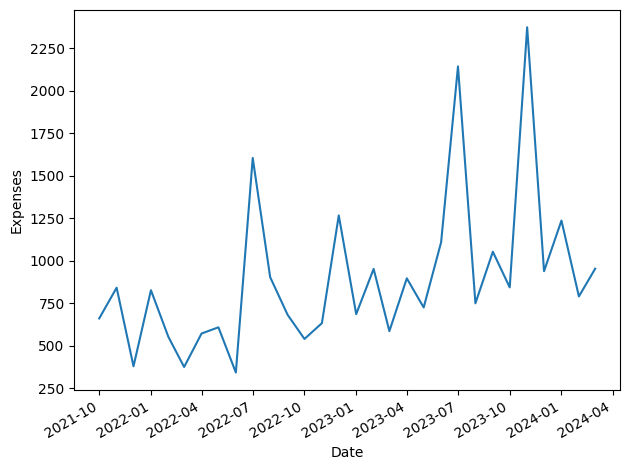

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(expenses.index, expenses.y)
ax.set_xlabel('Date')
ax.set_ylabel('Expenses')

fig.autofmt_xdate()
plt.tight_layout()


In [62]:
# Testing for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(expenses.y)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.012447492548194
p-value: 2.0968112119230055e-05


JE stacionarno. Probati first difference

In [63]:
import pandas as pd
expenses["shift1"] = expenses.y.shift(1)
expenses["firstdiff"] = expenses.y - expenses.shift1
expenses

,y,shift1,firstdiff
Date,,,
2021-10-01,659.76,NaN,NaN
2021-11-01,840.82,659.76,181.06
2021-12-01,378.26,840.82,-462.56
2022-01-01,825.94,378.26,447.68
2022-02-01,551.60,825.94,-274.34
2022-03-01,374.27,551.60,-177.33
2022-04-01,571.23,374.27,196.96
2022-05-01,607.72,571.23,36.49
2022-06-01,341.75,607.72,-265.97


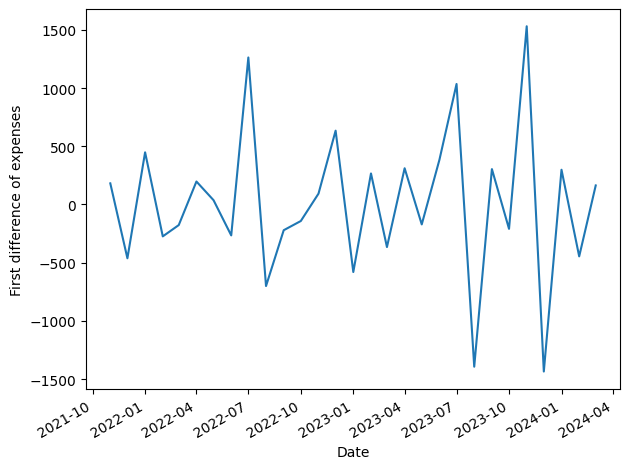

In [64]:
fig, ax = plt.subplots()

ax.plot(expenses.index, expenses["firstdiff"])
ax.set_xlabel('Date')
ax.set_ylabel('First difference of expenses')

fig.autofmt_xdate()
plt.tight_layout()


In [65]:
ADF_result = adfuller(expenses.firstdiff[1:])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

# A prvi diff nije stacionaran

ADF Statistic: -2.0984270470702846
p-value: 0.24514756401907317


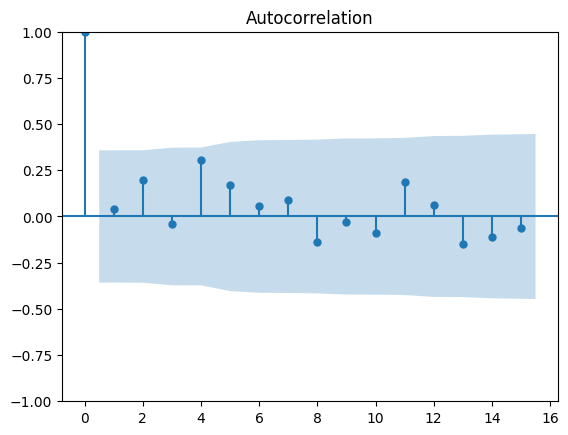

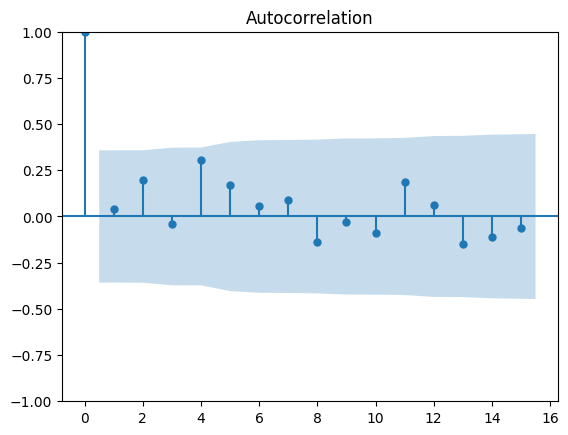

In [66]:
plot_acf(expenses.y, lags = 15)

Po ovome, mjesečni troškovi JESU random walk - serija je stacionarna i nema autokorelacije.

In [67]:
from time_series_expenses.prepare_data import daily
d_expenses = daily.copy(deep=True)
d_expenses.head()

,Amount
Date,
2021-09-25,29.20
2021-10-01,26.54
2021-10-02,30.53
2021-10-04,53.09
2021-10-07,39.95


In [68]:
# Nisu prisutni svi dani
raspon = pd.date_range(min(d_expenses.index), max(d_expenses.index))
raspon

DatetimeIndex(['2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04',
               ...
               '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23',
               '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27',
               '2024-03-28', '2024-03-29'],
              dtype='datetime64[ns]', length=917, freq='D')

In [69]:
# Izmjena indexa tako da sadrži sve vrijednosti u danom DatetimeIndex
d_expenses = d_expenses.reindex(raspon, fill_value=0)
d_expenses

,Amount
2021-09-25,29.2
2021-09-26,0.0
2021-09-27,0.0
2021-09-28,0.0
2021-09-29,0.0
...,...
2024-03-25,4.8
2024-03-26,32.1
2024-03-27,4.7
2024-03-28,61.4


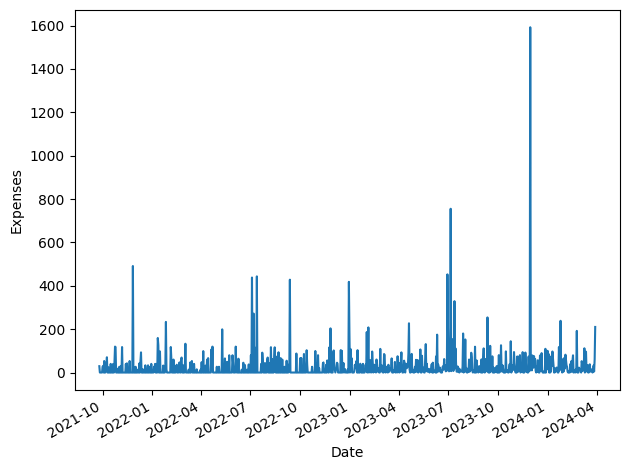

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(d_expenses.index, d_expenses.Amount)
ax.set_xlabel('Date')
ax.set_ylabel('Expenses')

fig.autofmt_xdate()
plt.tight_layout()


In [71]:
ADF_result = adfuller(d_expenses.Amount)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

# A prvi diff nije stacionaran

ADF Statistic: -30.158693269127646
p-value: 0.0


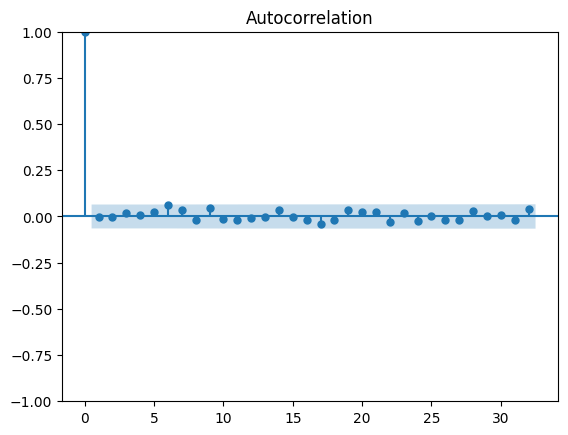

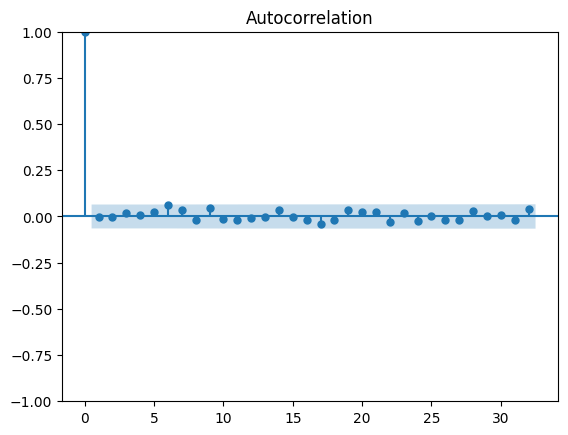

In [72]:
plot_acf(d_expenses.Amount, lags = 32)

I daily troškovi ispadaju random walk...

# ISPRAVAK NETOČNOG NAVODA
Random walk je serija čija PRVA RAZLIKA je stacionarna i nekorelirana.  
tako da MORA se promatrati prva razlika!

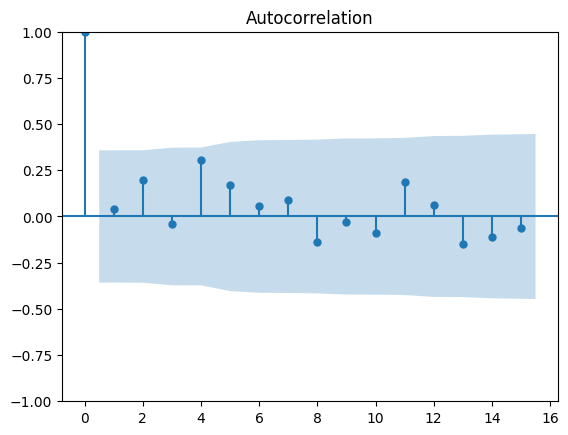

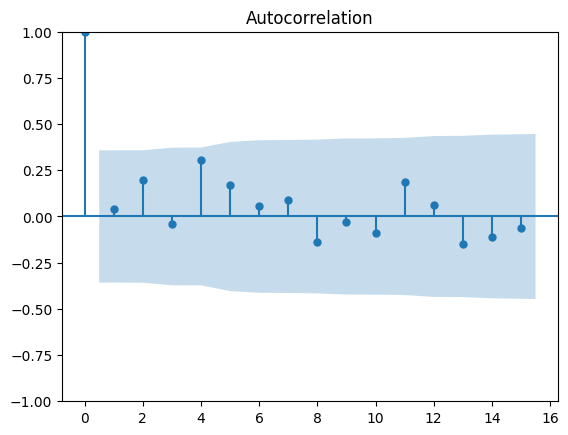

In [73]:
# Mjesečni nisu stacionarni. Usporedba slika korelacija y i first diff
plot_acf(expenses.y, lags = 15)

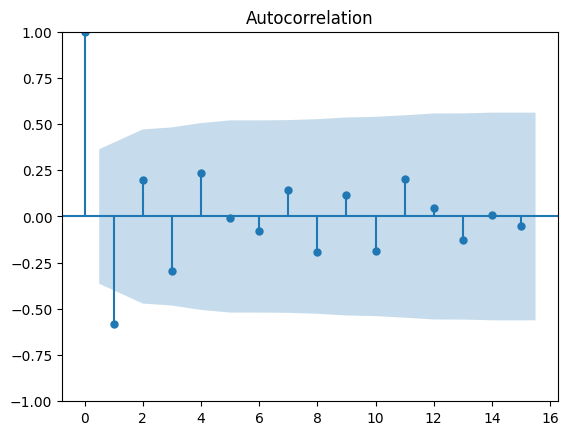

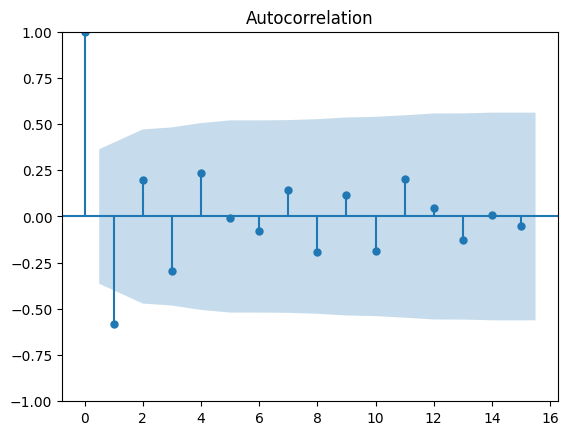

In [74]:
plot_acf(expenses.firstdiff[1:], lags = 15)

I za dnevne troškove...

In [75]:
d_expenses.Amount

2021-09-25     29.2
2021-09-26      0.0
2021-09-27      0.0
2021-09-28      0.0
2021-09-29      0.0
              ...  
2024-03-25      4.8
2024-03-26     32.1
2024-03-27      4.7
2024-03-28     61.4
2024-03-29    210.1
Freq: D, Name: Amount, Length: 917, dtype: float64

In [76]:
import numpy as np
daily_first_diff = np.diff(d_expenses.Amount, 1)

In [77]:
ADF_result = adfuller(daily_first_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
# Prvi diff JE stacionaran (većina vrijednosti oko nule...)

ADF Statistic: -11.515449398973697
p-value: 4.1609334236703985e-21


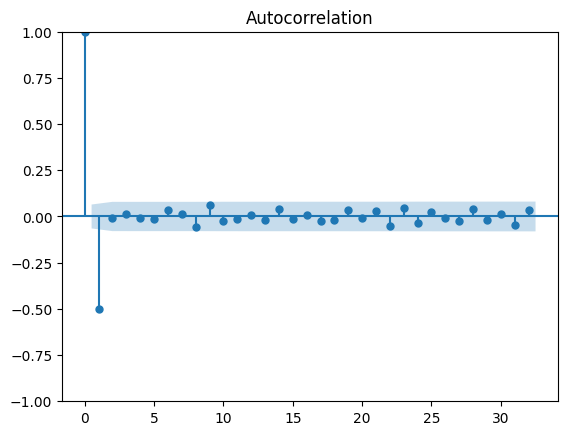

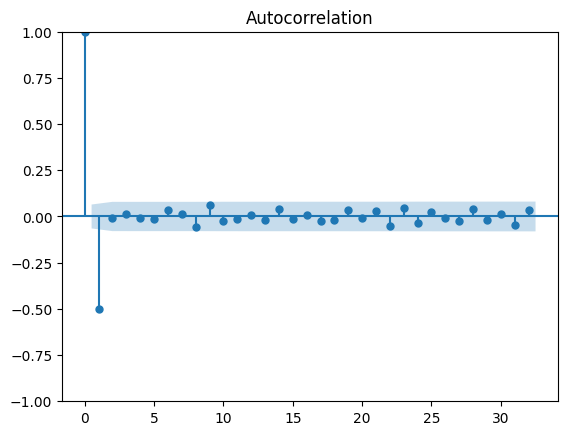

In [78]:
plot_acf(daily_first_diff, lags = 32)
# Snažna negativna korelacija na prvi lag! dakle, nije random walk.